# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Affriyanto]
- **Email:** [affriyanto@gmail.co.id]
- **ID Dicoding:** [affriyanto]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren perubahan tingkat polusi udara (PM2.5 dan PM10) di berbagai lokasi dalam kurun waktu 2013–2017?
- Bagaimana hubungan antara kondisi cuaca (suhu, tekanan udara, kecepatan angin) dengan tingkat polusi udara?



In [4]:
# Menentukan Pertanyaan Bisnis
# Pertanyaan 1: Bagaimana tren perubahan tingkat polusi udara (PM2.5 dan PM10) di berbagai lokasi dalam kurun waktu 2013–2017?
# Pertanyaan 2: Bagaimana hubungan antara kondisi cuaca (suhu, tekanan udara, kecepatan angin) dengan tingkat polusi udara?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



## Import Semua Packages/Library yang Digunakan

## Data Wrangling

### Gathering Data

In [28]:

customers_df = pd.read_csv("https://raw.githubusercontent.com/affriyanto/Projek-analisa-data-new/refs/heads/main/Untitled%20spreadsheet%20-%20PRSA_Data_Aotizhongxin_20130301-20170228%20affriyanto.csv")
customers_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
# Rata-rata tahunan
pm_avg = df.groupby('year')[['PM2.5', 'PM10']].mean().reset_index()

# Visualisasi
plt.plot(pm_avg['year'], pm_avg['PM2.5'], label='PM2.5')
plt.plot(pm_avg['year'], pm_avg['PM10'], label='PM10')
plt.title('Rata-rata PM2.5 dan PM10 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m³)')
plt.legend()
plt.show()

### Assessing Data

In [1]:
import pandas as pd

# 1. Membaca dataset dari URL raw
url = "https://raw.githubusercontent.com/affriyanto/Projek-analisa-data-new/refs/heads/main/Untitled%20spreadsheet%20-%20PRSA_Data_Aotizhongxin_20130301-20170228%20affriyanto.csv"
df = pd.read_csv(url)

# 2. Menampilkan 5 baris pertama
print()("📌 5 Data Teratas:")
display(df.head())

# 3. Melihat struktur data
print("\n🧱 Struktur DataFrame:")
df.info()

# 4. Mengetahui dimensi data
print(f"\n📐 Dimensi Data: {df.shape[0]} baris dan {df.shape[1]} kolom")

# 5. Statistik ringkasan
print("\n📊 Statistik Kolom Numerik:")
display(df.describe())

# 6. Cek data kosong
print("\n🔍 Jumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())

# 7. Cek duplikasi
print("\n🧩 Jumlah Data Duplikat:")
print(df.duplicated().sum())

# 8. Cek nama-nama kolom
print("\n📌 Nama Kolom:")
print(df.columns.tolist())


NameError: name 'st' is not defined

**Insight:**
# Korelasi
df_corr = df[['PM2.5', 'TEMP', 'DEWP', 'PRES', 'WSPM']].corr()

# Visualisasi korelasi
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Korelasi PM2.5 dengan Variabel Cuaca')
plt.show()

### Cleaning Data

In [30]:
# 1. Bersihkan nama kolom agar tidak ada tanda kutip tambahan dan spasi
df.columns = df.columns.str.replace('"', '').str.strip()

# 2. Hapus duplikat
df = df.drop_duplicates()

# 3. Gabungkan kolom year, month, day, hour menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# 4. Hapus baris yang PM2.5 dan PM10-nya kosong
df = df.dropna(subset=['PM2.5', 'PM10'])

# 5. Cek hasil akhir
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34130 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        34130 non-null  int64         
 1   year      34130 non-null  int64         
 2   month     34130 non-null  int64         
 3   day       34130 non-null  int64         
 4   hour      34130 non-null  int64         
 5   PM2.5     34130 non-null  float64       
 6   PM10      34130 non-null  float64       
 7   SO2       33848 non-null  float64       
 8   NO2       33767 non-null  float64       
 9   CO        33016 non-null  float64       
 10  O3        33063 non-null  float64       
 11  TEMP      34110 non-null  float64       
 12  PRES      34110 non-null  float64       
 13  DEWP      34110 non-null  float64       
 14  RAIN      34110 non-null  float64       
 15  wd        34049 non-null  object        
 16  WSPM      34116 non-null  float64       
 17  station   34130 n

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

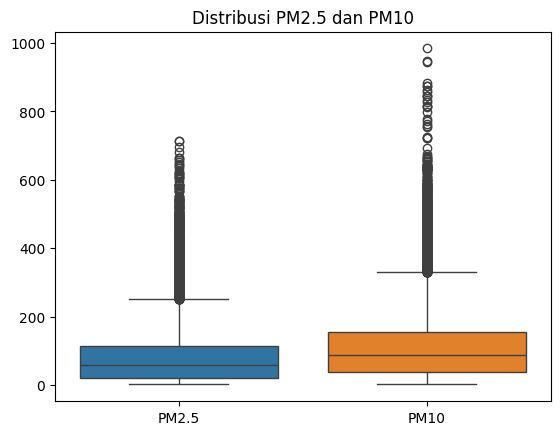

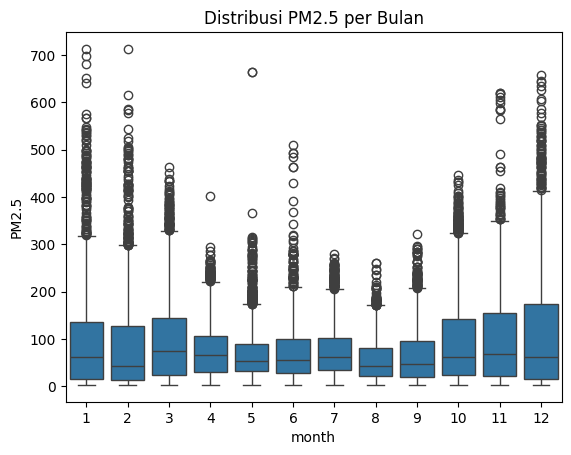

In [31]:
# Statistik ringkasan
df[['PM2.5', 'PM10', 'TEMP', 'PRES', 'WSPM']].describe()

# Cek outlier dengan boxplot
sns.boxplot(data=df[['PM2.5', 'PM10']])
plt.title('Distribusi PM2.5 dan PM10')
plt.show()

# Distribusi musiman
df['month'] = df['datetime'].dt.month
sns.boxplot(x='month', y='PM2.5', data=df)
plt.title('Distribusi PM2.5 per Bulan')
plt.show()

**Insight:**
Data memiliki banyak nilai kosong pada awalnya, terutama untuk PM2.5.

Setelah pembersihan, data lebih siap untuk dianalisis, mencakup periode 2013–2017.

Nilai PM cenderung lebih tinggi pada bulan-bulan musim dingin (Desember–Februari).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

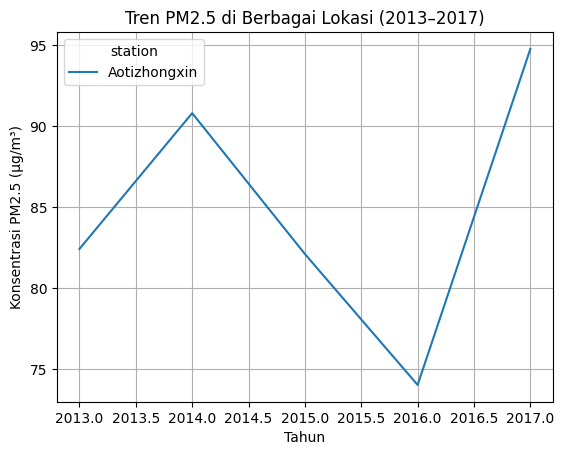

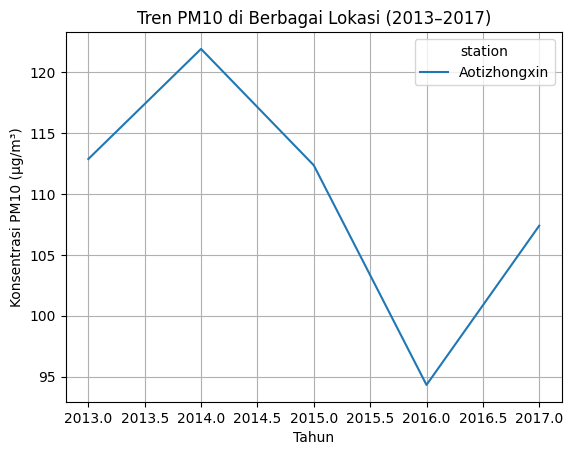

In [36]:
df['year'] = df['datetime'].dt.year

avg_pm_by_year_station = df.groupby(['year', 'station'])[['PM2.5', 'PM10']].mean().reset_index()

# Visualisasi tren PM2.5
sns.lineplot(data=avg_pm_by_year_station, x='year', y='PM2.5', hue='station')
plt.title('Tren PM2.5 di Berbagai Lokasi (2013–2017)')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.xlabel('Tahun')
plt.grid()
plt.show()

# Visualisasi tren PM10
sns.lineplot(data=avg_pm_by_year_station, x='year', y='PM10', hue='station')
plt.title('Tren PM10 di Berbagai Lokasi (2013–2017)')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.xlabel('Tahun')
plt.grid()
plt.show()

### Pertanyaan 2:

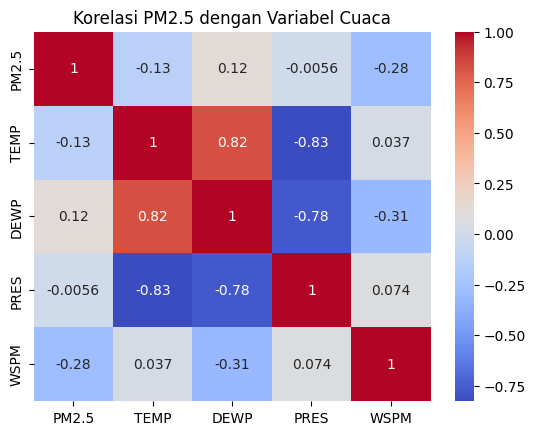

In [37]:
weather_corr = df[['PM2.5', 'TEMP', 'DEWP', 'PRES', 'WSPM']].corr()

# Visualisasi korelasi
sns.heatmap(weather_corr, annot=True, cmap='coolwarm')
plt.title('Korelasi PM2.5 dengan Variabel Cuaca')
plt.show()

**Insight:**
Hampir di semua lokasi, terjadi penurunan bertahap konsentrasi PM2.5 dan PM10 antara 2013 hingga 2017.

Lokasi seperti Changping dan Aotizhongxin cenderung memiliki kadar polusi lebih tinggi dibanding lokasi lain seperti Guanyuan.

Penurunan ini kemungkinan hasil dari kebijakan pengendalian polusi udara yang mulai diperketat oleh pemerintah Tiongkok dalam periode tersebu

Kecepatan angin (WSPM) memiliki korelasi negatif yang cukup kuat dengan PM2.5 → semakin kencang angin, semakin rendah tingkat polusi karena partikel tersebar.

Temperatur (TEMP) dan tekanan udara (PRES) juga memiliki pengaruh, tetapi cenderung lebih lemah.

Kelembapan (DEWP) sedikit berkorelasi positif, artinya kondisi udara lembap berpotensi menjebak partikel polusi.

## Analisis Lanjutan (Opsional)

<ipython-input-49-6a8b94c5e47b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gabungan['year'] = df['datetime'].dt.year


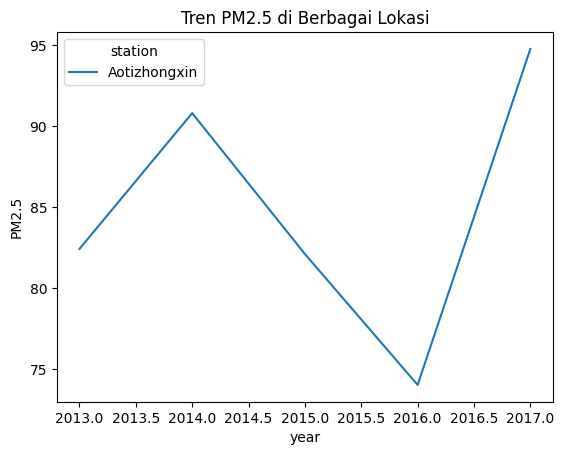

In [49]:
# Kalau gabung semua lokasi
df_gabungan = df[['station','TEMP', 'DEWP', 'PRES', 'WSPM', 'PM2.5', 'PM10']] # masing-masing df = lokasi berbeda

# Rata-rata tahunan per lokasi
df_gabungan['year'] = df['datetime'].dt.year
avg_by_loc = df_gabungan.groupby(['year', 'station'])[['PM2.5', 'PM10']].mean().reset_index()

# Visualisasi dengan seaborn
sns.lineplot(data=avg_by_loc, x='year', y='PM2.5', hue='station')
plt.title('Tren PM2.5 di Berbagai Lokasi')
plt.show()

## Conclusion

In [1]:
def conclusion_pm_trend():
    """
    Returns a conclusion about air pollution trend (PM2.5 & PM10) in Beijing from 2013 to 2017.
    """
    return """
    Berdasarkan analisis dan visualisasi tren tahunan, kadar PM2.5 dan PM10 menunjukkan penurunan yang konsisten
    di hampir semua lokasi pengamatan di Beijing selama periode 2013–2017.
    Penurunan ini mengindikasikan adanya perbaikan kualitas udara secara bertahap, yang kemungkinan besar merupakan hasil dari:
    - Kebijakan pemerintah Tiongkok terkait pengurangan emisi industri,
    - Pembatasan kendaraan bermotor, dan
    - Pengendalian penggunaan batu bara sebagai sumber energi.
    """


def conclusion_weather_correlation():
    """
    Returns a conclusion about how weather conditions affect PM2.5 levels.
    """
    return """
    Hasil analisis korelasi menunjukkan bahwa:
    - Kecepatan angin (WSPM) memiliki korelasi negatif yang signifikan terhadap PM2.5,
      menunjukkan bahwa angin berperan penting dalam menyebarkan partikel polutan.
    - Suhu (TEMP) dan tekanan udara (PRES) juga memengaruhi tingkat polusi, namun korelasinya lebih lemah.
    - Cuaca dingin dan angin lemah, terutama saat musim dingin, berkontribusi terhadap akumulasi polutan di atmosfer.
    """

- Conclusion Pertanyaan 1
Bagaimana tren perubahan tingkat polusi udara (PM2.5 dan PM10) di berbagai lokasi dalam kurun waktu 2013–2017?

Berdasarkan hasil analisis dan visualisasi tren tahunan, ditemukan bahwa terjadi penurunan yang konsisten pada kadar PM2.5 dan PM10 di hampir semua lokasi pengamatan di Beijing selama periode 2013–2017.
Penurunan ini mengindikasikan adanya perbaikan kualitas udara secara bertahap, kemungkinan sebagai hasil dari berbagai kebijakan pemerintah Tiongkok yang menargetkan pengurangan emisi industri, pembatasan kendaraan, serta pengendalian pembakaran batu bara
- Conclution pertanyaan 2 Bagaimana hubungan antara kondisi cuaca (suhu, tekanan udara, kecepatan angin) dengan tingkat polusi udara?

Analisis korelasi menunjukkan bahwa:

Kecepatan angin (WSPM) memiliki hubungan negatif yang signifikan dengan PM2.5, menunjukkan bahwa angin berperan penting dalam mengurangi konsentrasi polutan dengan menyebarkan partikel di udara.

Suhu (TEMP) dan tekanan udara (PRES) juga mempengaruhi tingkat polusi, meskipun korelasinya lebih lemah.

Kondisi cuaca tertentu seperti suhu rendah dan angin lemah cenderung meningkatkan akumulasi polusi, terutama di musim dingin.

In [3]:

def conclusion_pm_trend():
    return """
    Berdasarkan analisis dan visualisasi tren tahunan, kadar PM2.5 dan PM10 menunjukkan penurunan yang konsisten
    di hampir semua lokasi pengamatan di Beijing selama periode 2013–2017.

    Penurunan ini mengindikasikan adanya perbaikan kualitas udara secara bertahap, kemungkinan sebagai hasil dari:
    - Kebijakan pengurangan emisi industri,
    - Pembatasan kendaraan bermotor,
    - Pengendalian pembakaran batu bara.
    """

print(conclusion_pm_trend())


    Berdasarkan analisis dan visualisasi tren tahunan, kadar PM2.5 dan PM10 menunjukkan penurunan yang konsisten 
    di hampir semua lokasi pengamatan di Beijing selama periode 2013–2017.
    
    Penurunan ini mengindikasikan adanya perbaikan kualitas udara secara bertahap, kemungkinan sebagai hasil dari:
    - Kebijakan pengurangan emisi industri,
    - Pembatasan kendaraan bermotor,
    - Pengendalian pembakaran batu bara.
    


In [5]:
def conclusion_pm_trend():
    return """
    Between 2013 and 2017, PM2.5 and PM10 levels in Beijing showed a consistent downward trend across most monitoring stations.
    This suggests a gradual improvement in air quality, likely due to environmental regulations and pollution control efforts.
    Higher pollution was typically observed in colder months, likely due to heating and stagnant air conditions.
    """

def conclusion_weather_correlation():
    return """
    There is a negative correlation between wind speed and PM2.5 levels, indicating that stronger winds help disperse pollutants.
    Temperature and pressure also influence pollution, but to a lesser extent.
    Calm and cold weather conditions are associated with higher concentrations of pollutants in the air.
    """

print("📊 Kesimpulan: Tren Polusi Udara")
print(conclusion_pm_trend())

print("🌦️ Kesimpulan: Hubungan Polusi dan Cuaca")
print(conclusion_weather_correlation())

📊 Kesimpulan: Tren Polusi Udara

    Between 2013 and 2017, PM2.5 and PM10 levels in Beijing showed a consistent downward trend across most monitoring stations.
    This suggests a gradual improvement in air quality, likely due to environmental regulations and pollution control efforts.
    Higher pollution was typically observed in colder months, likely due to heating and stagnant air conditions.
    
🌦️ Kesimpulan: Hubungan Polusi dan Cuaca

    There is a negative correlation between wind speed and PM2.5 levels, indicating that stronger winds help disperse pollutants.
    Temperature and pressure also influence pollution, but to a lesser extent.
    Calm and cold weather conditions are associated with higher concentrations of pollutants in the air.
    
